# Split dataset tests

In [1]:
# Allow reloading of libraries without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
import lynx_id

## Raw dataset

/tmp/xpython_888166/1761532475.py:12: DtypeWarning: Columns (2,3,4,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_csv)


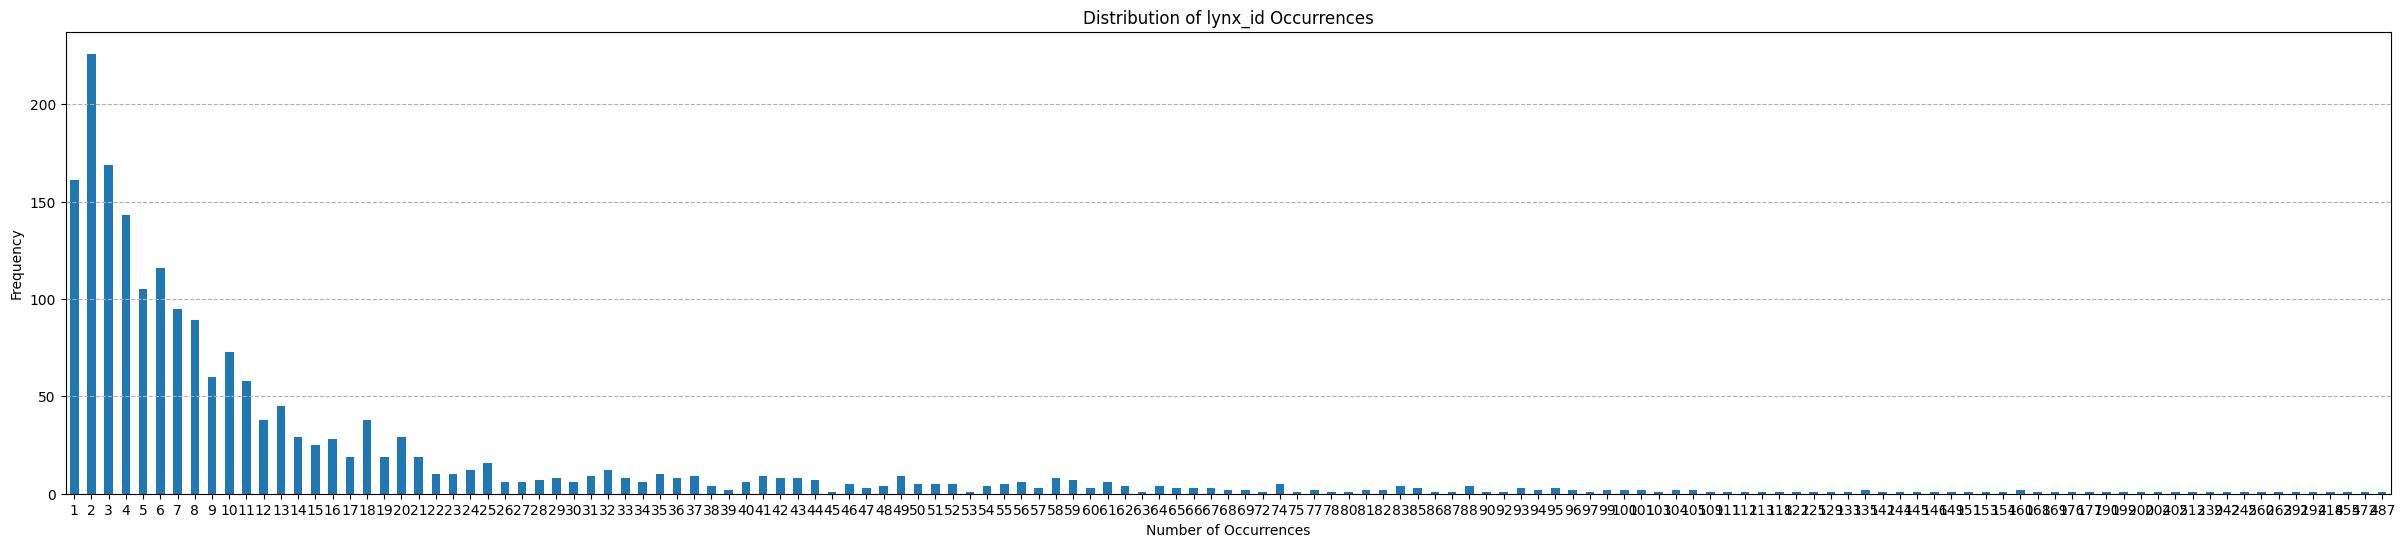

In [3]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from lynx_id.utils.split_dataset import plot_occurrence_distribution

# Define the path
dataset_csv = Path('/lustre/fsn1/projects/rech/ads/commun/datasets/extracted/lynx_dataset_full_v2.csv')

# Check if the file exists before attempting to load it
if dataset_csv.is_file():
    # Load the CSV file into a DataFrame
    df = pd.read_csv(dataset_csv)
    # Display the first few rows to understand its features
    display = df.head()
    # Also list all column names to see the features explicitly
    features = df.columns.tolist()
else:
    display = "File does not exist at the specified path."
    features = []

#display, features
plot_occurrence_distribution(df, 'lynx_id')

## Splitting the csv

### Naive split

/lustre/fswork/projects/rech/ads/ssos023/DP-SCR_Identify-and-estimate-density-lynx-population/lynx_id/utils/split_dataset.py:36: DtypeWarning: Columns (2,3,4,5,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_csv_path)


Number of samples in the training set: 24887
Number of samples in the validation set: 5332
Number of samples in the test set: 5334


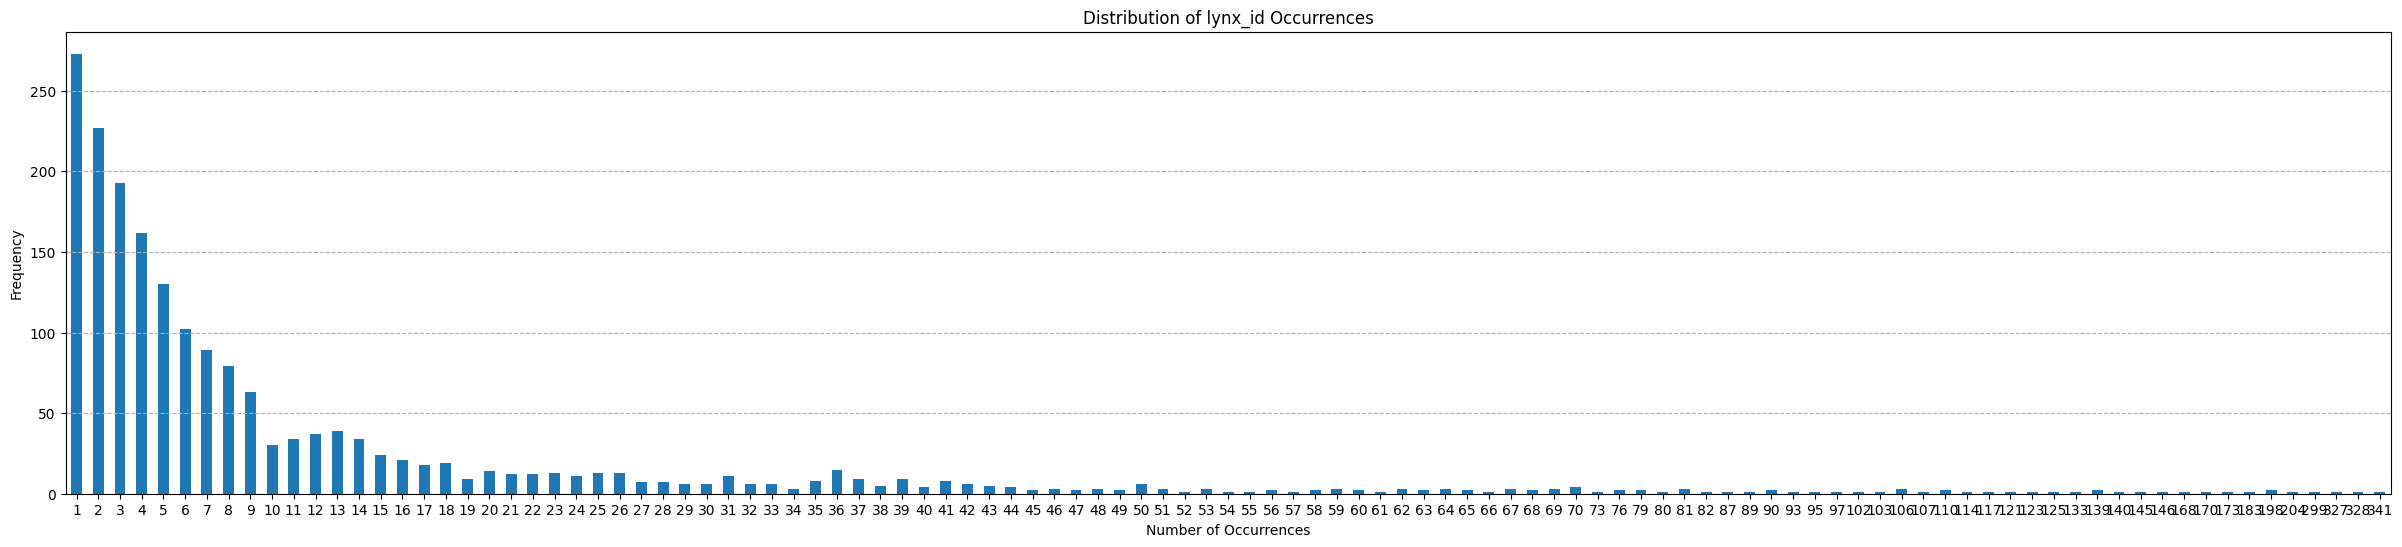

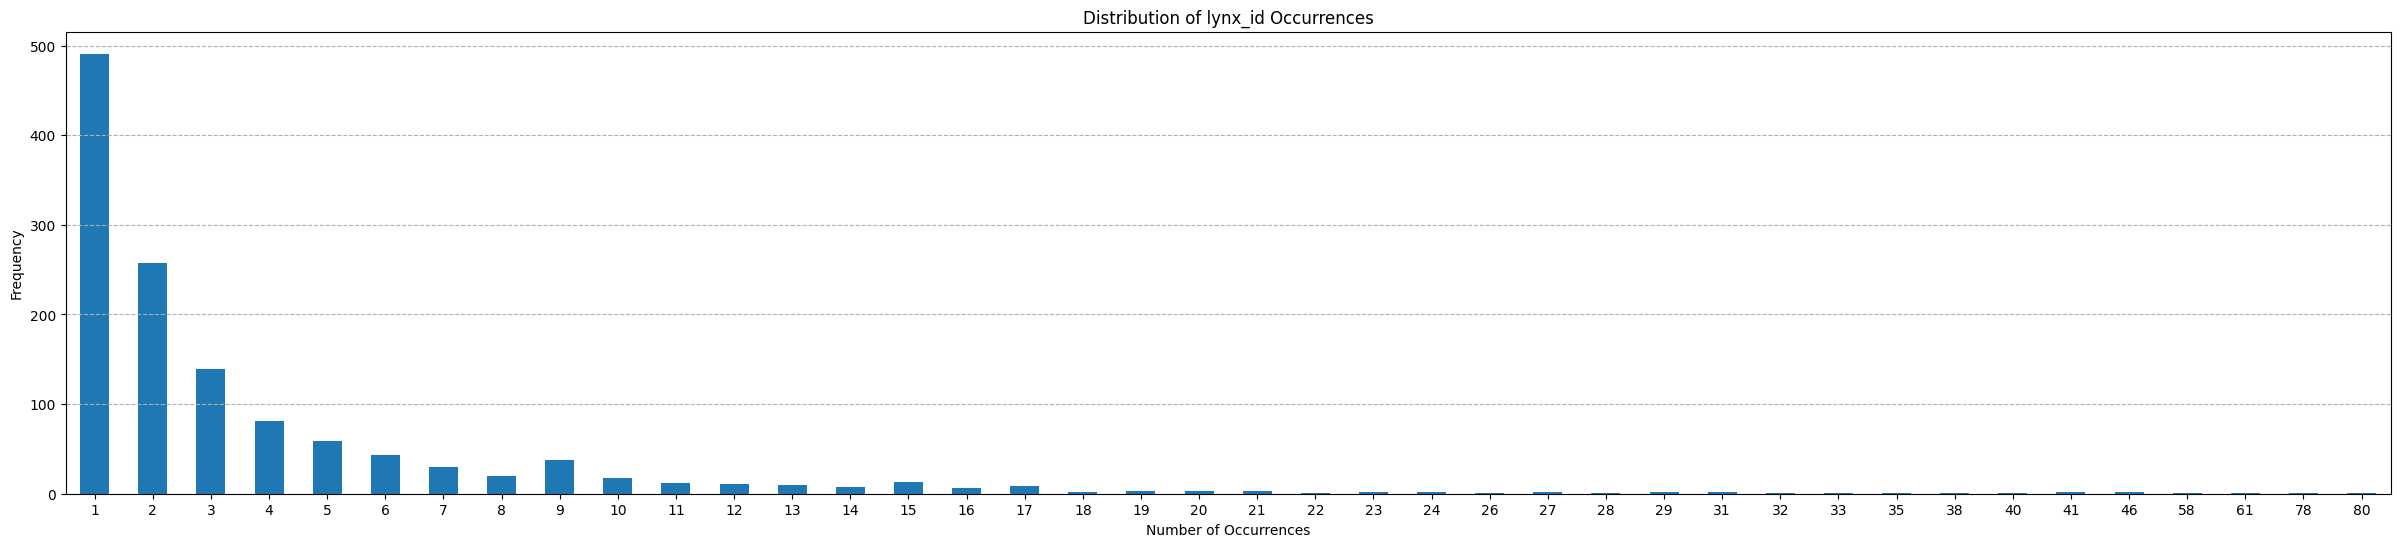

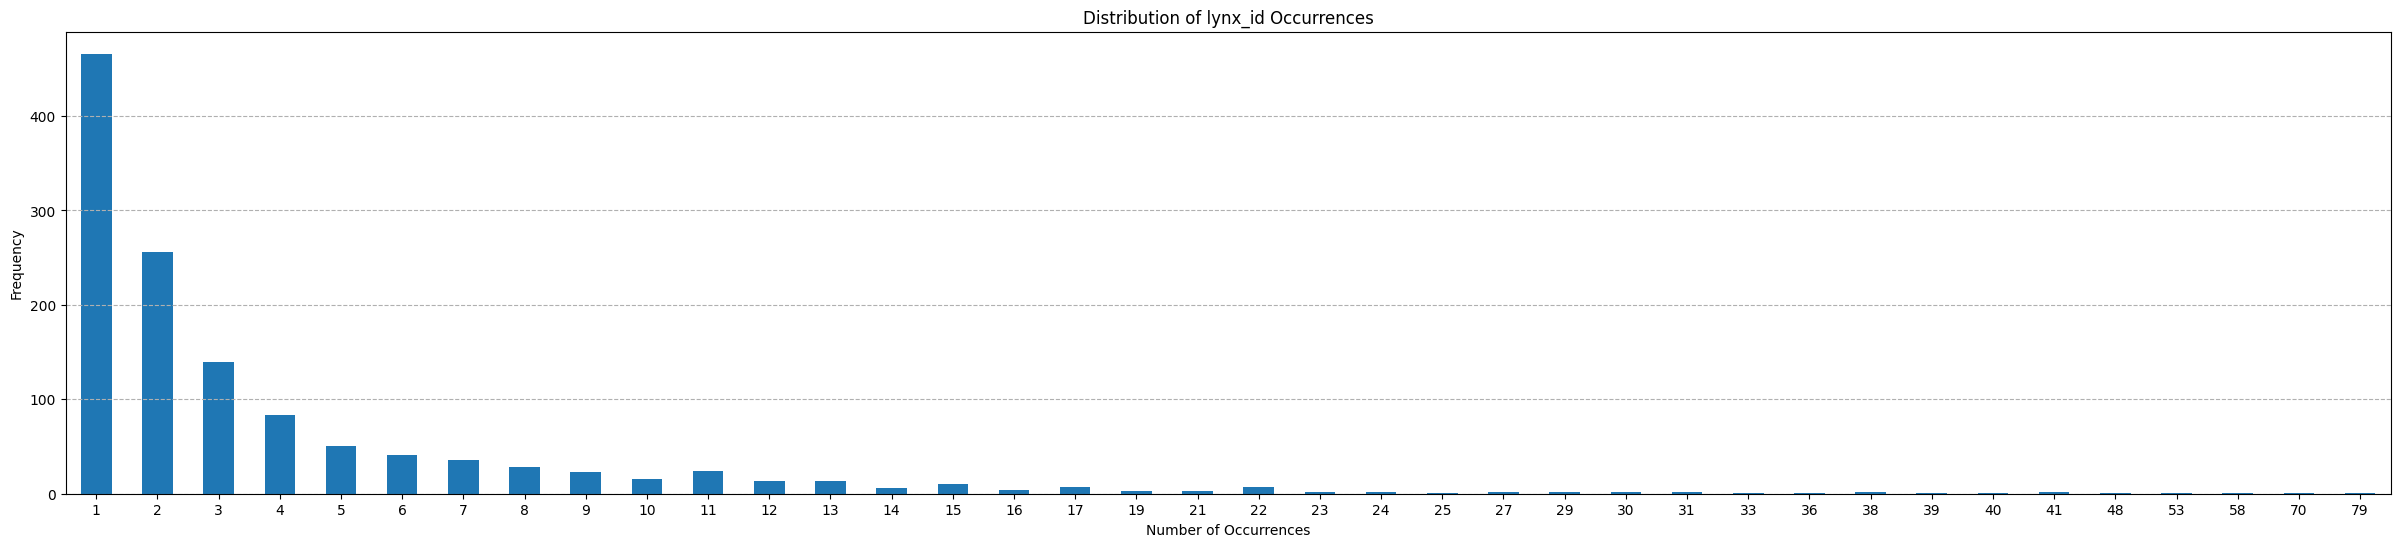

In [4]:
from lynx_id.utils.split_dataset import naive_split_dataset

# Assuming dataset_csv is defined and points to the path of your dataset
train_df, val_df, test_df = naive_split_dataset(dataset_csv, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, random_seed=42)

# Instead of just printing the length, add a description to make it clear what's being printed
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")

plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

### Advanced split

Number of samples in the training set: 19112
Number of samples in the validation set: 7814
Number of samples in the test set: 8627


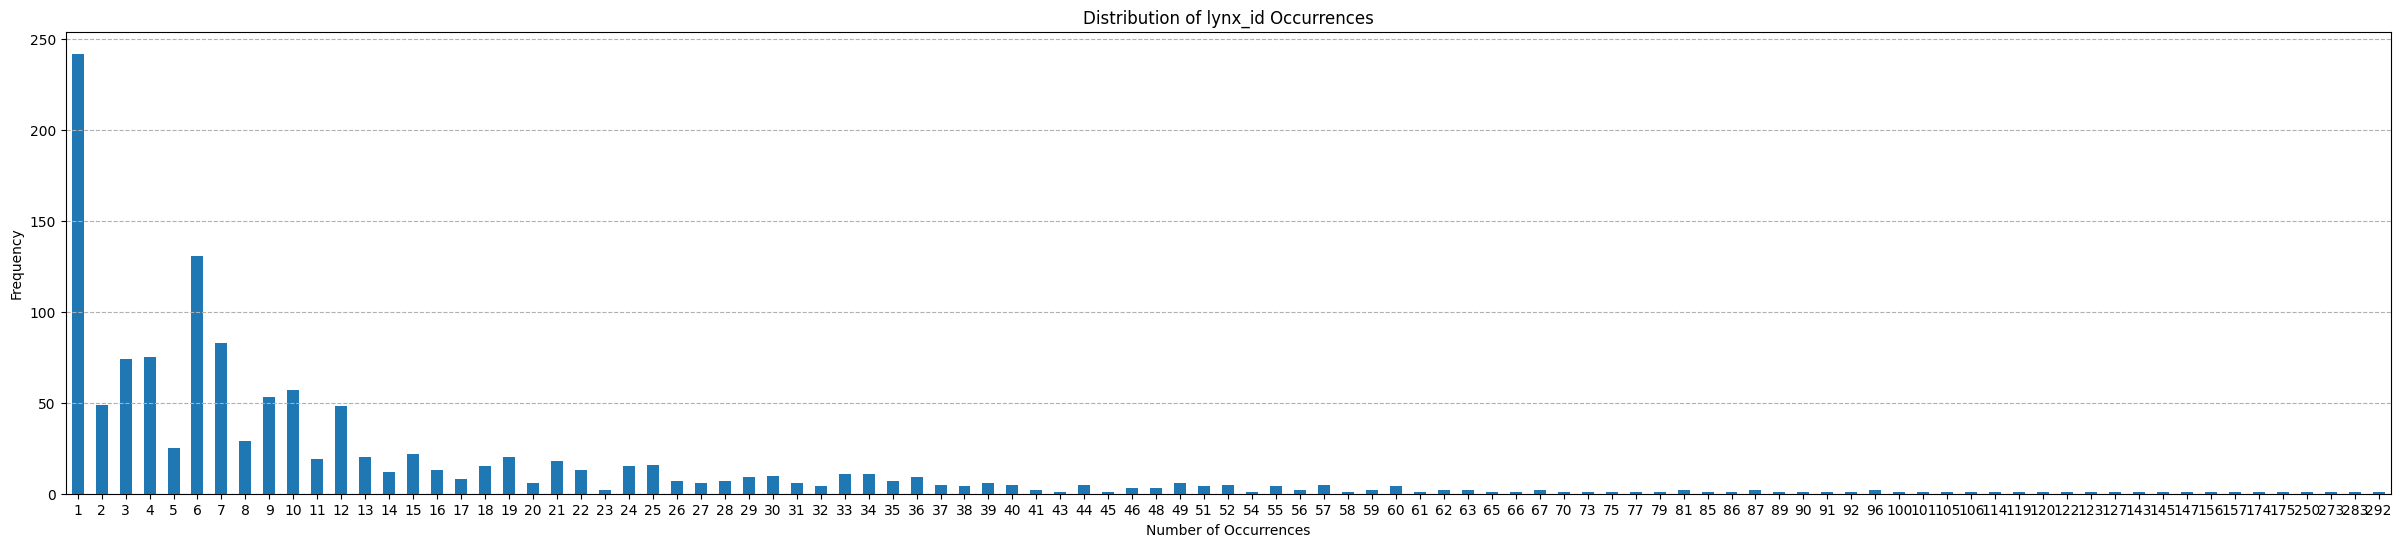

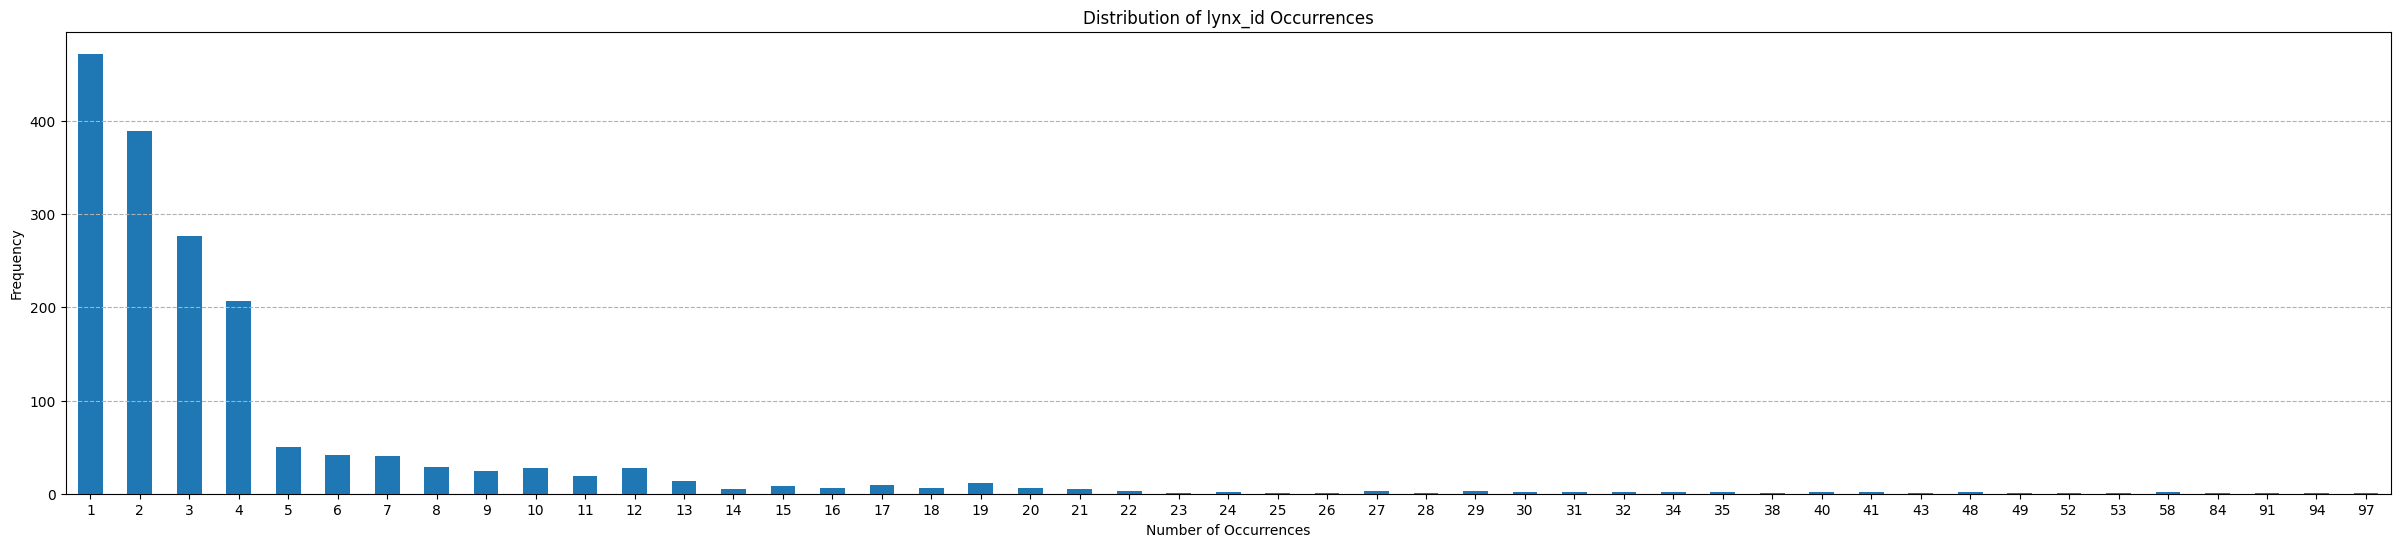

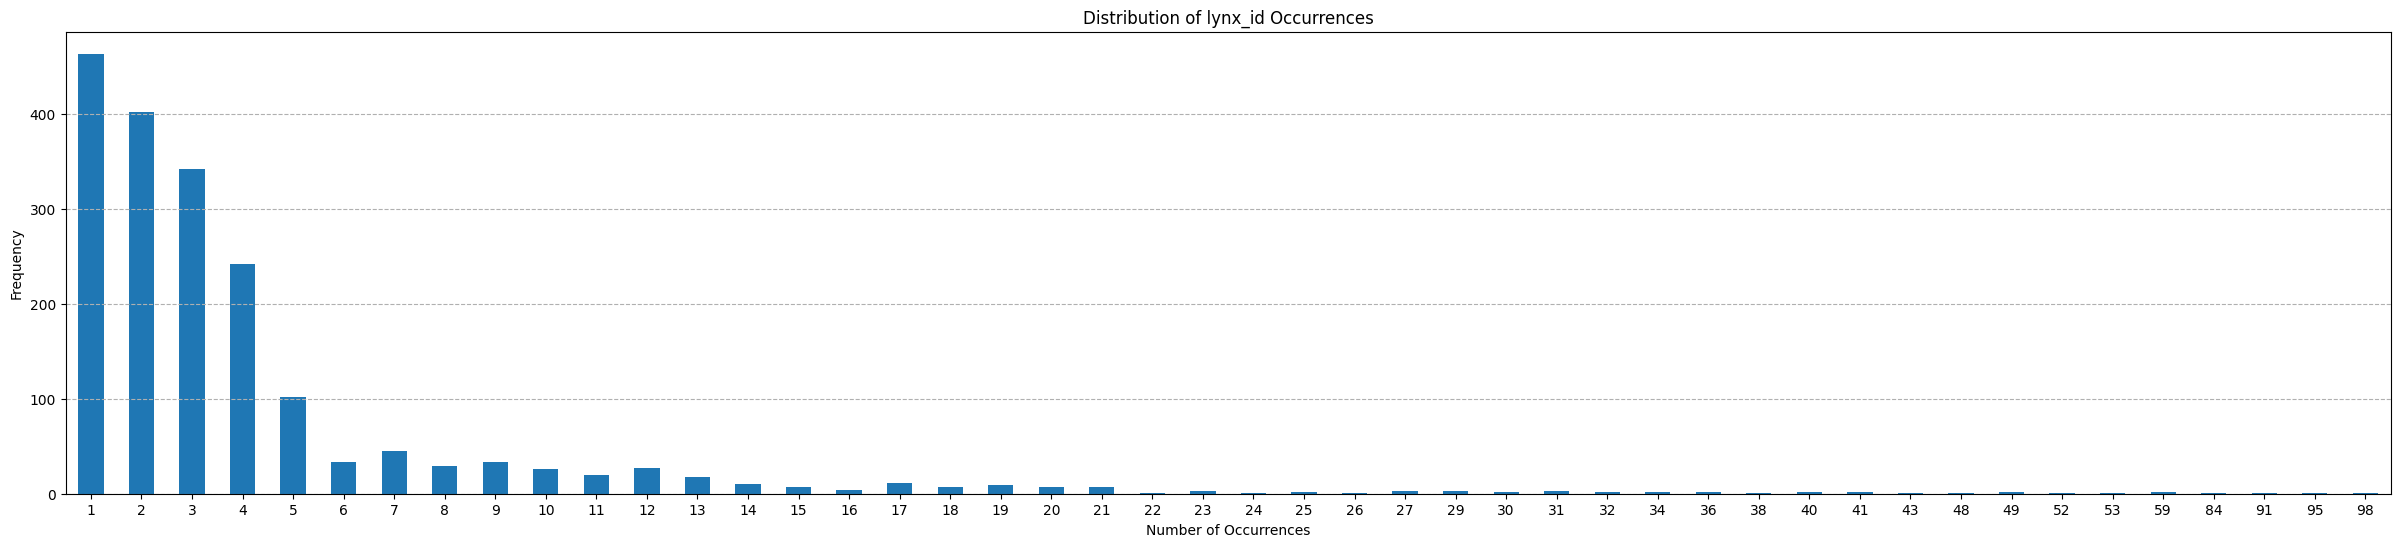

In [5]:
from lynx_id.utils.split_dataset import complex_split_dataset
train_df, val_df, test_df, complete_df = complex_split_dataset(df, 
                                                               threshold=10, 
                                                               high_occurrence_ratios=(0.6, 0.2, 0.2), 
                                                               low_occurrence_ratios=(0.6, 0.2, 0.2), 
                                                               unseen_ratio=0.6, 
                                                               random_seed=42)


# Instead of just printing the length, add a description to make it clear what's being printed
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")

plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

In [6]:
complete_df[complete_df["set"]=="val"].head()
complete_df[complete_df["lynx_id_visibility"]=="seen"].head()


,filepath,lynx_id,source,pattern,date,location,image_number,conf,x,y,...,filepath_no_bg,score_sam,number_animals,number_children,sex,side,latitude,longitude,set,lynx_id_visibility
0,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,21.0,0.923,766.8752,993.98400,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.952402,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
1,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,3.0,0.978,842.9568,670.92480,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.965796,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
2,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,173.0,0.979,450.9696,119.99232,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.982738,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
3,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,109.0,0.913,389.9392,448.97280,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.975082,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
4,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,66.0,0.928,589.8240,614.86080,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.979210,NaN,NaN,NaN,NaN,NaN,NaN,train,seen


In [7]:
train_df = complete_df[complete_df["set"]=="train"]
val_df = complete_df[complete_df["set"]=="val"]
test_df = complete_df[complete_df["set"]=="test"]

In [8]:
complete_df.groupby('set')['lynx_id_visibility'].value_counts()

set    lynx_id_visibility
test   seen                   6976
       unseen                 1651
train  seen                  19112
val    seen                   6496
       unseen                 1318
Name: count, dtype: int64

In [9]:
nb_total_lynxes = len(complete_df['lynx_id'].value_counts())

print(f"All | number of images: {complete_df.shape[0]}")
print(f"All | number of lynxes: {nb_total_lynxes}")

All | number of images: 35553
All | number of lynxes: 1967


In [10]:
train_lynx_id = set(train_df['lynx_id'].tolist())

print(f"Train | number of images: {train_df.shape[0]}")
print(f"Train | number of lynxes: {len(train_lynx_id)}")

Train | number of images: 19112
Train | number of lynxes: 1268


In [11]:
nb_images = val_df.shape[0]
nb_lynxes = len(val_df['lynx_id'].value_counts())
val_lynx_id = set(val_df['lynx_id'].tolist())
nb_lynxes_not_in_training = len(val_lynx_id - train_lynx_id)
nb_new_images = len(val_df[val_df['lynx_id_visibility'] == 'unseen'])

print(f"Val | number of images: {nb_images}")
print(f"Val | number of lynxes: {nb_lynxes}")
print(f'Val | number of lynx_ids (not images) not seen in the training set (=New): {nb_lynxes_not_in_training} ({round(nb_lynxes_not_in_training / nb_total_lynxes, 2)}%)')
print(f"Val | number of New images: {nb_new_images} ({round(nb_new_images / nb_images, 2)}%)")

Val | number of images: 7814
Val | number of lynxes: 1717
Val | number of lynx_ids (not images) not seen in the training set (=New): 619 (0.31%)
Val | number of New images: 1318 (0.17%)


In [12]:
nb_images = test_df.shape[0]
nb_lynxes = len(test_df['lynx_id'].value_counts())
test_lynx_id = set(test_df['lynx_id'].tolist())
nb_lynxes_not_in_training = len(test_lynx_id - train_lynx_id)
nb_new_images = len(test_df[test_df['lynx_id_visibility'] == 'unseen'])

print(f"Test | number of images: {nb_images}")
print(f"Test | number of lynxes: {nb_lynxes}")
print(f'Test | number of lynx_ids (not images) not seen in the training set (=New): {nb_lynxes_not_in_training} ({round(nb_lynxes_not_in_training / nb_total_lynxes, 2)}%)')
print(f"Test | number of New images: {nb_new_images} ({round(nb_new_images / nb_images, 2)}%)")

Test | number of images: 8627
Test | number of lynxes: 1886
Test | number of lynx_ids (not images) not seen in the training set (=New): 699 (0.36%)
Test | number of New images: 1651 (0.19%)


## Re-evaluate a good distribution without swiss data

In [13]:
if 'country' in df.columns:
    # Get all unique country names
    unique_countries = df['country'].unique()
    print("Available countries:", unique_countries)
else:
    print("The 'country' column is not present in the DataFrame.")
    
# Filter rows where the country is "Swiss"
df = df[df['country'] != 'swiss']

Available countries: ['France' 'croatia' 'slovenia' 'germany' 'swiss' 'spain']


### Advanced split

Number of samples in the training set: 8647
Number of samples in the validation set: 2059
Number of samples in the test set: 2526


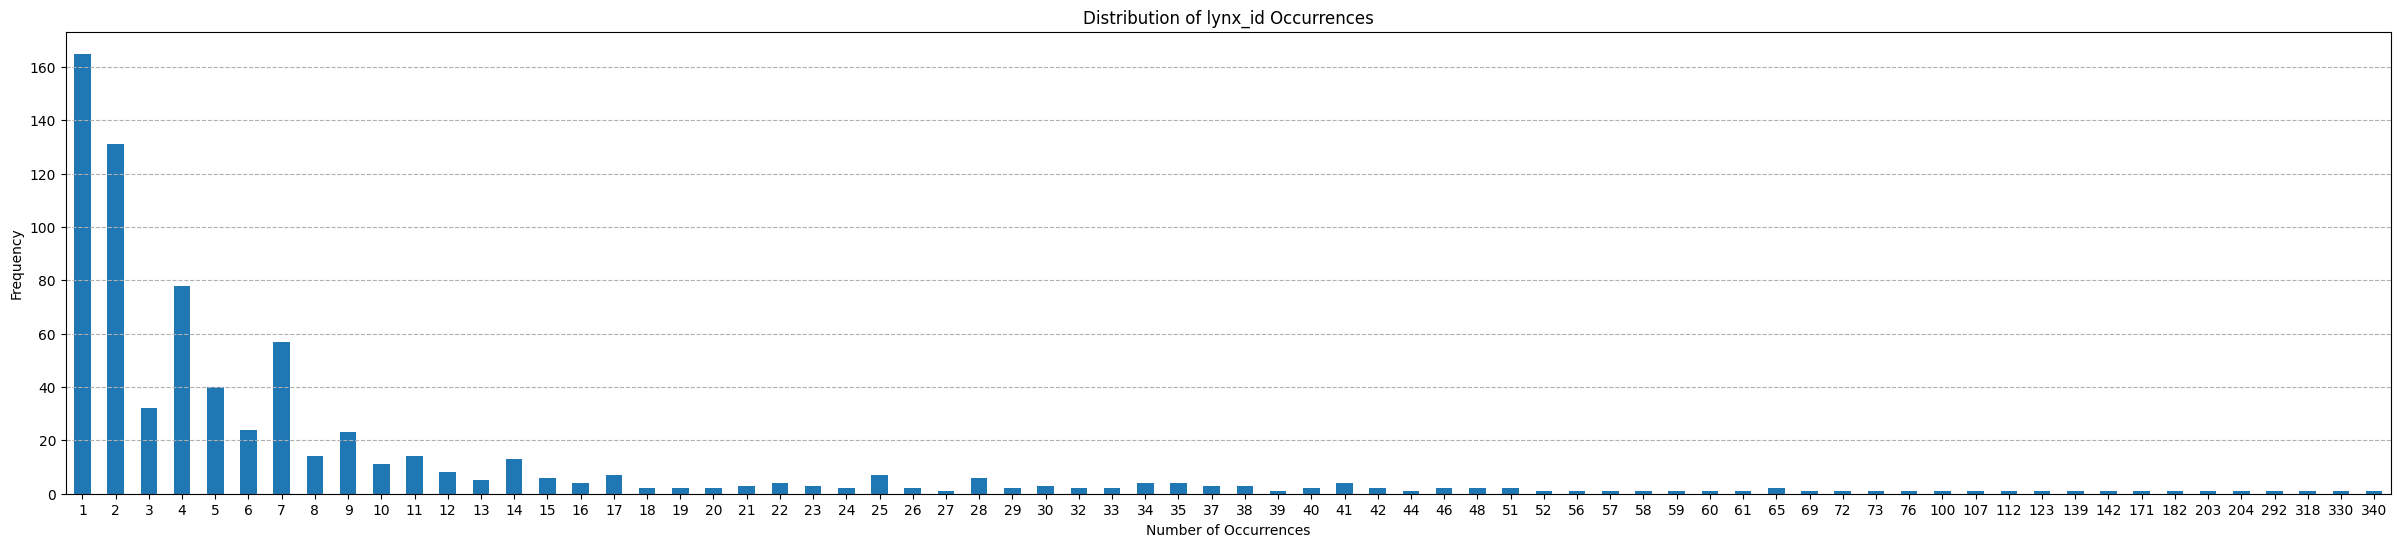

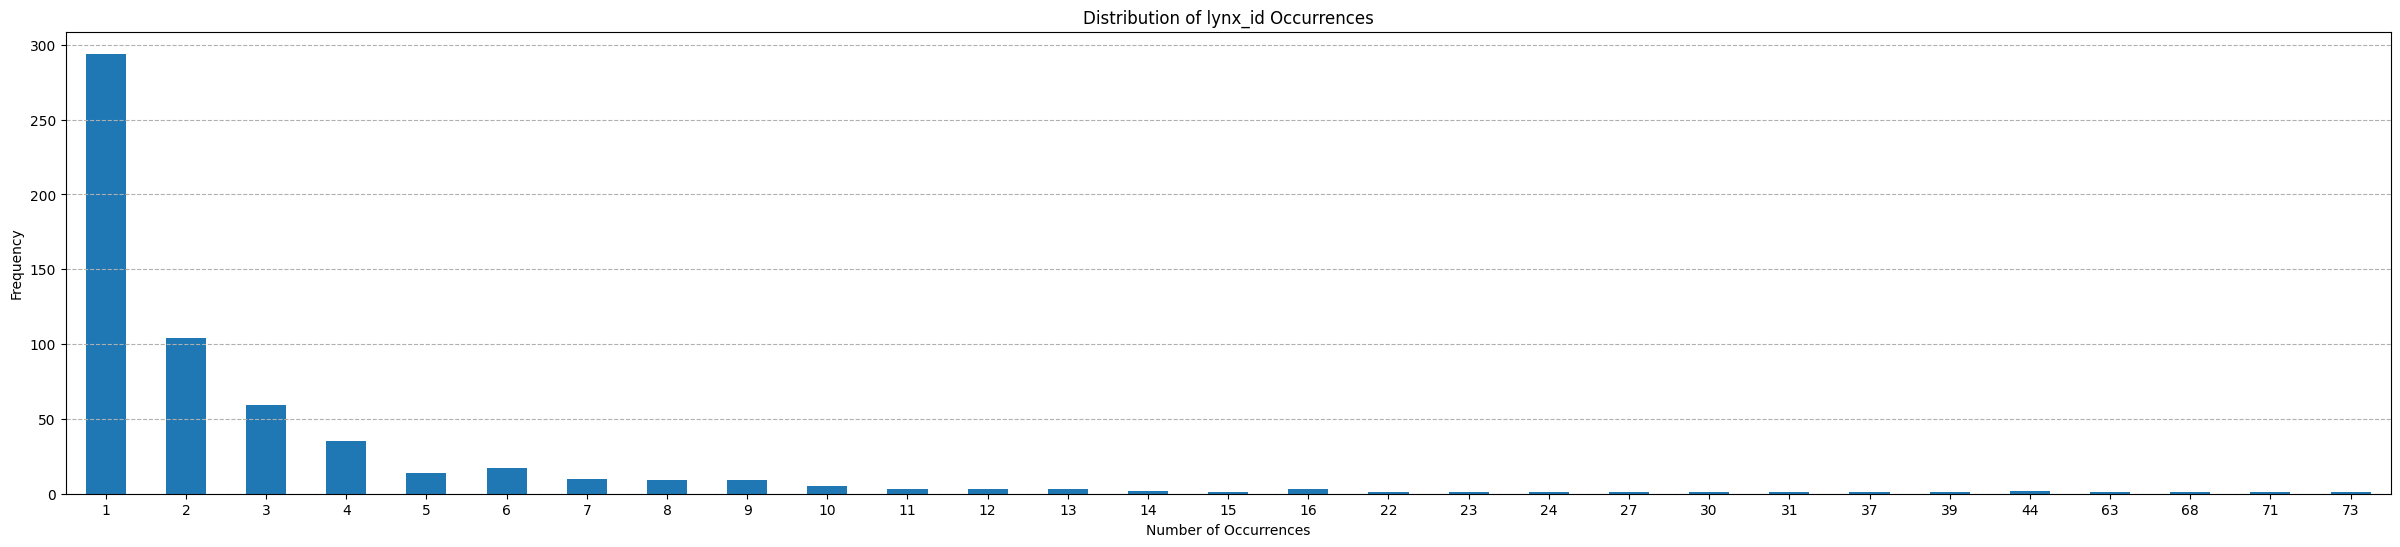

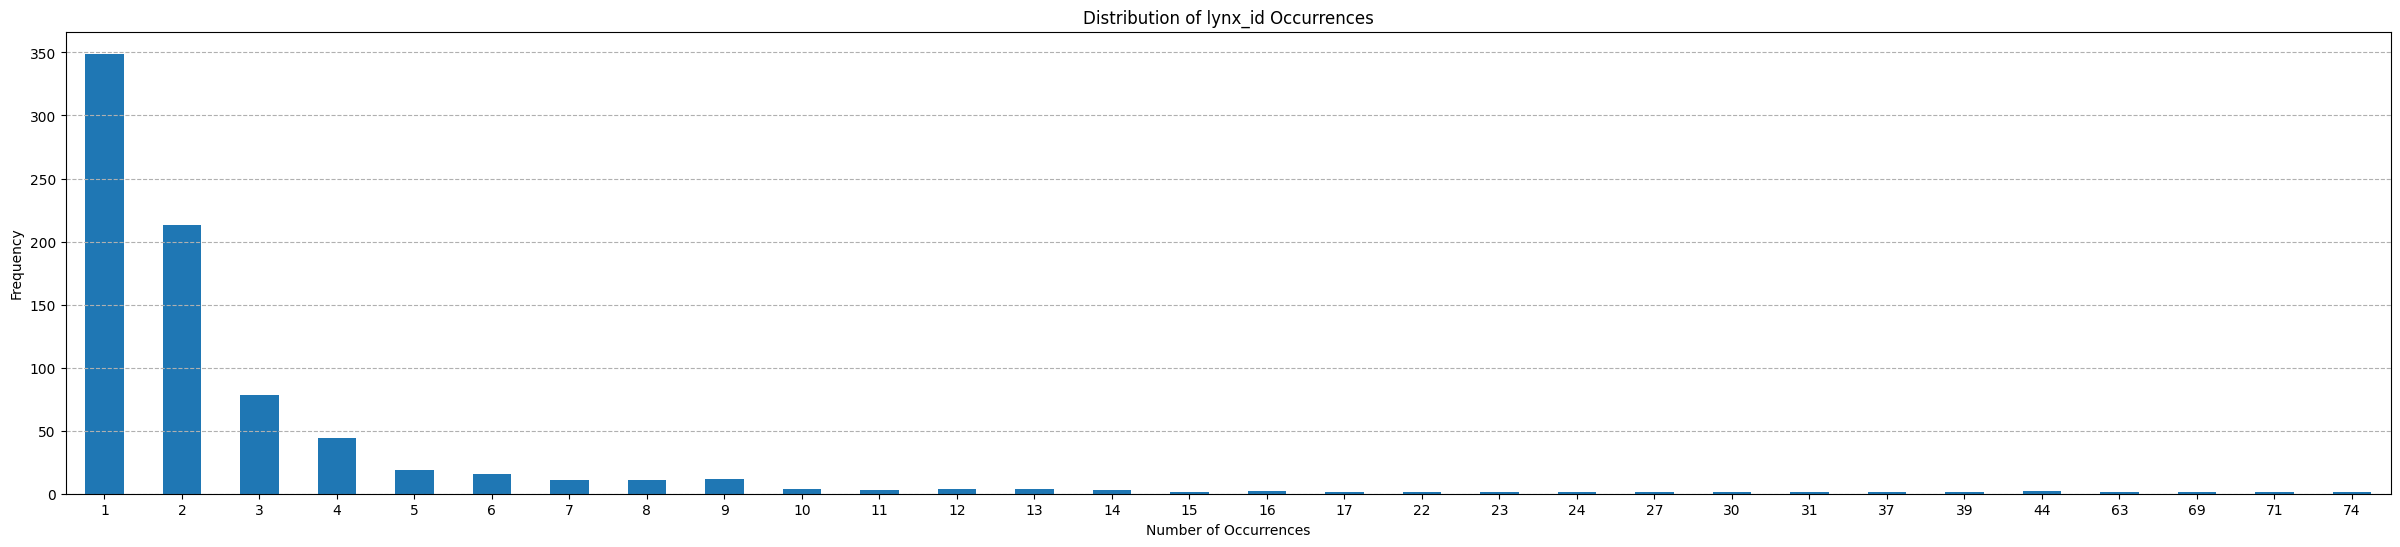

In [14]:
from lynx_id.utils.split_dataset import complex_split_dataset
train_df, val_df, test_df, complete_df = complex_split_dataset(df, 
                                                               threshold=10, 
                                                               high_occurrence_ratios=(0.7, 0.15, 0.15), 
                                                               low_occurrence_ratios=(0.7, 0.15, 0.15), 
                                                               unseen_ratio=0.2, 
                                                               random_seed=42)


# Instead of just printing the length, add a description to make it clear what's being printed
print(f"Number of samples in the training set: {len(train_df)}")
print(f"Number of samples in the validation set: {len(val_df)}")
print(f"Number of samples in the test set: {len(test_df)}")

plot_occurrence_distribution(train_df, 'lynx_id')
plot_occurrence_distribution(val_df, 'lynx_id')
plot_occurrence_distribution(test_df, 'lynx_id')

In [15]:
complete_df[complete_df["set"]=="val"].head()
complete_df[complete_df["lynx_id_visibility"]=="seen"].head()


,filepath,lynx_id,source,pattern,date,location,image_number,conf,x,y,...,filepath_no_bg,score_sam,number_animals,number_children,sex,side,latitude,longitude,set,lynx_id_visibility
0,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,4.0,0.964,1293.9264,391.9104,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.970699,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
1,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,185.0,0.960,696.9344,285.8496,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.965706,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
2,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,91.0,0.979,349.7984,630.9888,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.980394,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
3,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,51.0,0.974,747.9296,740.9664,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.986736,NaN,NaN,NaN,NaN,NaN,NaN,train,seen
4,/lustre/fsn1/projects/rech/ads/commun/datasets...,11_DE,NaN,NaN,NaN,NaN,57.0,0.955,1011.9168,755.8656,...,/lustre/fsn1/projects/rech/ads/commun/datasets...,0.982146,NaN,NaN,NaN,NaN,NaN,NaN,train,seen


In [16]:
train_df = complete_df[complete_df["set"]=="train"]
val_df = complete_df[complete_df["set"]=="val"]
test_df = complete_df[complete_df["set"]=="test"]

In [17]:
complete_df.groupby('set')['lynx_id_visibility'].value_counts()

set    lynx_id_visibility
test   seen                  2247
       unseen                 279
train  seen                  8647
val    seen                  1839
       unseen                 220
Name: count, dtype: int64

In [18]:
nb_total_lynxes = len(complete_df['lynx_id'].value_counts())

print(f"All | number of images: {complete_df.shape[0]}")
print(f"All | number of lynxes: {nb_total_lynxes}")

All | number of images: 13232
All | number of lynxes: 850


In [19]:
train_lynx_id = set(train_df['lynx_id'].tolist())

print(f"Train | number of images: {train_df.shape[0]}")
print(f"Train | number of lynxes: {len(train_lynx_id)}")

Train | number of images: 8647
Train | number of lynxes: 732


In [20]:
nb_images = val_df.shape[0]
nb_lynxes = len(val_df['lynx_id'].value_counts())
val_lynx_id = set(val_df['lynx_id'].tolist())
nb_lynxes_not_in_training = len(val_lynx_id - train_lynx_id)
nb_new_images = len(val_df[val_df['lynx_id_visibility'] == 'unseen'])

print(f"Val | number of images: {nb_images}")
print(f"Val | number of lynxes: {nb_lynxes}")
print(f'Val | number of lynx_ids (not images) not seen in the training set (=New): {nb_lynxes_not_in_training} ({round(nb_lynxes_not_in_training / nb_total_lynxes, 2)}%)')
print(f"Val | number of New images: {nb_new_images} ({round(nb_new_images / nb_images, 2)}%)")

Val | number of images: 2059
Val | number of lynxes: 585
Val | number of lynx_ids (not images) not seen in the training set (=New): 98 (0.12%)
Val | number of New images: 220 (0.11%)


In [21]:
nb_images = test_df.shape[0]
nb_lynxes = len(test_df['lynx_id'].value_counts())
test_lynx_id = set(test_df['lynx_id'].tolist())
nb_lynxes_not_in_training = len(test_lynx_id - train_lynx_id)
nb_new_images = len(test_df[test_df['lynx_id_visibility'] == 'unseen'])

print(f"Test | number of images: {nb_images}")
print(f"Test | number of lynxes: {nb_lynxes}")
print(f'Test | number of lynx_ids (not images) not seen in the training set (=New): {nb_lynxes_not_in_training} ({round(nb_lynxes_not_in_training / nb_total_lynxes, 2)}%)')
print(f"Test | number of New images: {nb_new_images} ({round(nb_new_images / nb_images, 2)}%)")

Test | number of images: 2526
Test | number of lynxes: 789
Test | number of lynx_ids (not images) not seen in the training set (=New): 118 (0.14%)
Test | number of New images: 279 (0.11%)


## In practice: Splitting using the dataset class

### Using the `split` method

In [76]:
from lynx_id.data.dataset import LynxDataset
dataset = LynxDataset(dataset_csv=train_df, loader="pil", mode="single")

input, output = dataset[0]  # Example for getting the first item

# Accessing data
image = input['image']
lynx_id = output['lynx_id']

In [77]:
train_set, val_set, test_set= dataset.split()
print(len(train_set))
print(len(val_set))
print(len(test_set))

6654
801
1192


### Using the `set` parameter

In [ ]:
from pathlib import Path
from lynx_id.data.dataset import LynxDataset
dataset_csv = Path('/gpfsscratch/rech/ads/commun/datasets/extracted/lynx_dataset_full.csv')

dataset = LynxDataset(dataset_csv=dataset_csv, set="test", loader="pil", mode="single")

input, output = dataset[0]  # Example for getting the first item

# Accessing data
image = input['image']
lynx_id = output['lynx_id']
print(len(dataset))

## Save csv files

In [22]:
import pandas as pd
import os
folder_path = Path("/lustre/fsn1/projects/rech/ads/commun/datasets/balanced_noswiss_csv")
file_prefix = "lynx_id_balanced"
train_path = os.path.join(folder_path, file_prefix + "_train.csv")
val_path = os.path.join(folder_path, file_prefix + "_val.csv")
test_path = os.path.join(folder_path, file_prefix + "_test.csv")
train_df.to_csv(train_path, index=False)
val_df.to_csv(val_path, index=False)
test_df.to_csv(test_path, index=False)